# Logistic Regression 

Logistic Regression is widely used for clasification purposes.

In this python notebook we will perform logistic regression using python from scratch and use gradient descent to fit the model on data to be clasified.

We first create a toy dataset.

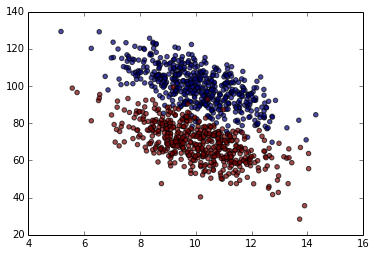

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

num_instances = 500
m = 2*num_instances
np.random.seed(20)

mean = [10, 100]
cov = [[1, 1], [-10, 120]] 
x1 = np.random.multivariate_normal(mean, cov, num_instances).T

mean = [10, 70]
cov = [[1, 1], [-10, 120]] 
x2 = np.random.multivariate_normal(mean, cov, num_instances).T

x = np.hstack((x1,x2)).T
y = np.vstack((np.zeros((num_instances,1)), np.ones((num_instances,1))))


plt.scatter(x[:, 0], x[:, 1], c = y, alpha = 0.7)
plt.show()

#### Cost Function that needs to be minimized
$$ J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h^{(i)})+(1-y^{(i)})\log(1-h^{(i)}) $$

#### Gardient Descent calculation to update weights
$$ \theta_j = \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h^{(i)} - y^{(i)}) x_j^{(i)} $$

In [2]:
def sigmoid(u):
    return (1.0 / (1.0 + np.exp((-1.0) * u)))

def propagate(w, b):
    global x,y
    z = np.matmul(x, w.T) + b
    h = sigmoid(z)
    
    cost = (-1 / m) * np.sum(np.multiply(y,np.log(h)) + np.multiply((1-y),np.log(1-h))) 
    
    dw = (1 / m) * (np.matmul((h-y).T, x))
    db = (1 / m) * (np.sum(h-y))
    return dw, db, cost, h
    

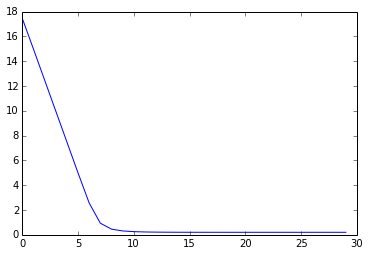

In [3]:
w = np.asarray([[0, 0]])
b = 35
learning_rate = 0.001
iterations = 30
costs = []

for i in range(iterations):
    dw, db, cost, _ = propagate(w, b)
    w = w - (learning_rate) * dw
    b = b - (learning_rate) * db
    costs.append(cost)

plt.plot(range(iterations),costs)
plt.show()

Predicting the clases for the same training set.

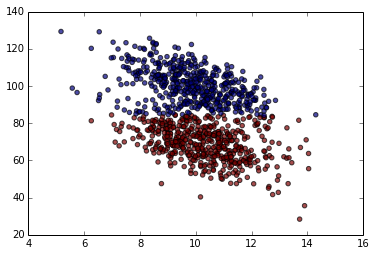

In [4]:
dw, db, cost, p = propagate(w, b)

for i in range(m):
    if p[i] >= 0.5:
        p[i] = 1
    else:
        p[i] = 0
    
plt.scatter(x[:, 0], x[:, 1], c = p, alpha = 0.7)
plt.show()